In [1]:
from transformers import pipeline
import torch
import requests
import PIL.Image

In [2]:
image_url = "https://ankur3107.github.io/assets/images/image-captioning-example.png"
image = PIL.Image.open(requests.get(image_url, stream=True, timeout=3000).raw)

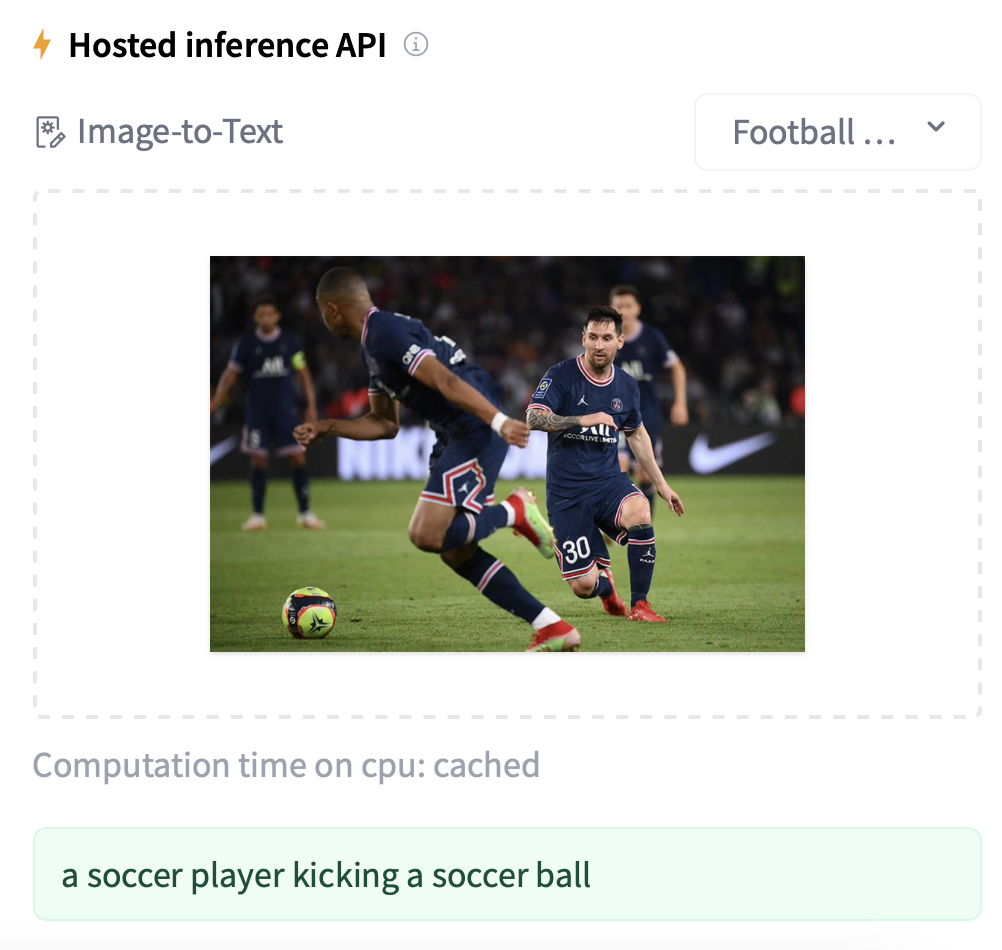

In [3]:
image

In [4]:
model_id = "nlpconnect/vit-gpt2-image-captioning"
# model_id = "Salesforce/blip-image-captioning-large"

if torch.cuda.is_available():
  device="cuda"
elif torch.xpu.is_available():
  device="xpu"
else:
  device="cpu"

print("Using device:", device)
image_to_text = pipeline("image-to-text", model=model_id, device=device, torch_dtype=torch.float16)

Using device: xpu


config.json: 0.00B [00:00, ?B/s]

C:\Users\gta\miniforge3\Lib\site-packages\transformers\models\auto\modeling_auto.py:2242: FutureWarning: The class `AutoModelForVision2Seq` is deprecated and will be removed in v5.0. Please use `AutoModelForImageTextToText` instead.
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/982M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/982M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/241 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/120 [00:00<?, ?B/s]

Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/228 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use xpu


In [6]:
output = image_to_text(image)
output

[{'generated_text': 'a soccer game with a player jumping to catch the ball '}]